# Étape 1 : recuperation des données

In [61]:


#move to your working directory, ideally data and jupyter-notebook should be there
#setwd("C:/Users/thiba/OneDrive - HESSO/Annee_3/Semestre2/DataMining/TP1")
#check whether we moved there
#getwd()

#read the titanic data
myData <- read.table (file="adult.csv",sep=",", header=T)

Affichage des collones du fichier

In [ ]:
#affichage de tous les noms de colonnes
colnames(myData)

[1] "age"            "workclass"      "fnlwgt"         "education"     
 [5] "education.num"  "marital.status" "occupation"     "relationship"  
 [9] "race"           "sex"            "capital.gain"   "capital.loss"  
[13] "hours.per.week" "native.country" "income"

Affichage d'un resumer des datas

In [63]:
summary(myData)

      age                    workclass         fnlwgt       
 Min.   :17.00    Private         :22696   Min.   :  12285  
 1st Qu.:28.00    Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00    Local-gov       : 2093   Median : 178356  
 Mean   :38.58    ?               : 1836   Mean   : 189778  
 3rd Qu.:48.00    State-gov       : 1298   3rd Qu.: 237051  
 Max.   :90.00    Self-emp-inc    : 1116   Max.   :1484705  
                 (Other)          :  981                    
         education     education.num                  marital.status 
  HS-grad     :10501   Min.   : 1.00    Divorced             : 4443  
  Some-college: 7291   1st Qu.: 9.00    Married-AF-spouse    :   23  
  Bachelors   : 5355   Median :10.00    Married-civ-spouse   :14976  
  Masters     : 1723   Mean   :10.08    Married-spouse-absent:  418  
  Assoc-voc   : 1382   3rd Qu.:12.00    Never-married        :10683  
  11th        : 1175   Max.   :16.00    Separated            : 1025  
 (Other)      : 5134  

# Etape 2: Choix des attribues qualitatifs ayant un impact sur le revenu
###  for sure :Work class / education / occupation / specialty
### to check: native country  / race / sex

## workclass

                   income
workclass           <=50K  >50K
   ?                 1645   191
   Federal-gov        589   371
   Local-gov         1476   617
   Never-worked         7     0
   Private          17733  4963
   Self-emp-inc       494   622
   Self-emp-not-inc  1817   724
   State-gov          945   353
   Without-pay         14     0

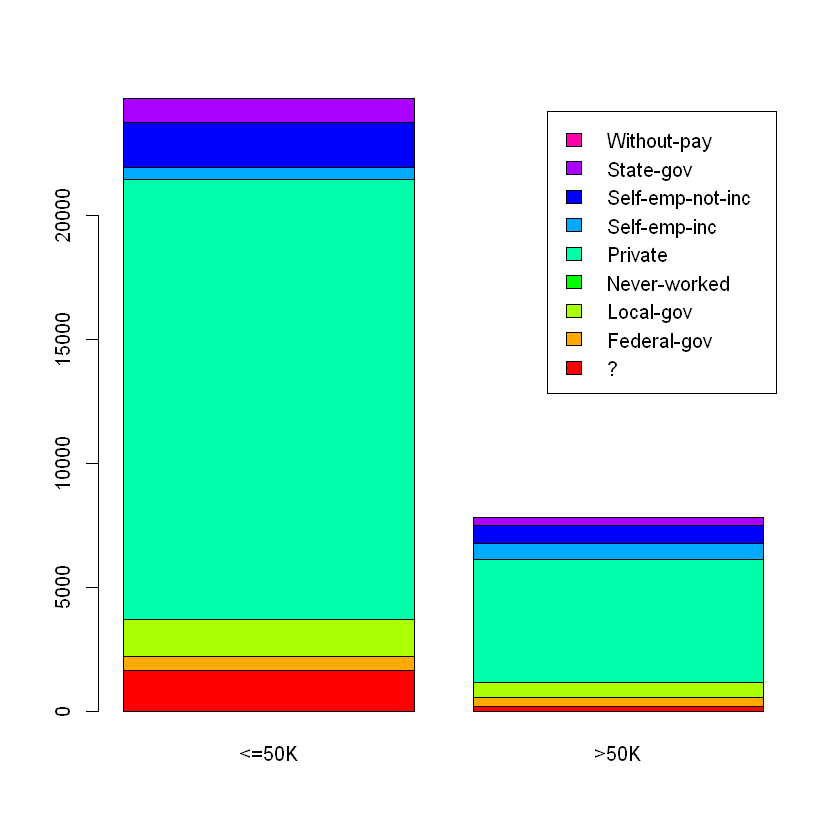

In [64]:

nbworkclass <- length(unique(myData$workclass))
table(myData[,c(2,15)])
barplot((table(myData[,c(2,15)])),  legend=T,col=rainbow(nbworkclass))
